# Stack Overflow Developer Survey

In [29]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline
from collections import defaultdict

#### Load survey data

In [30]:
# load data
survey_df = pd.read_csv('./survey_results_public.csv')
survey_df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Exploring data

In [31]:
#number of rows
survey_df.shape[0]

51392

In [32]:
#cloumns data types
survey_df.dtypes

Respondent                int64
Professional             object
ProgramHobby             object
Country                  object
University               object
                         ...   
QuestionsInteresting     object
QuestionsConfusing       object
InterestedAnswers        object
Salary                  float64
ExpectedSalary          float64
Length: 154, dtype: object

In [33]:
#check null values
survey_df.isnull().sum()

Respondent                  0
Professional                0
ProgramHobby                0
Country                     0
University                  0
                        ...  
QuestionsInteresting    16856
QuestionsConfusing      16973
InterestedAnswers       16780
Salary                  38501
ExpectedSalary          48826
Length: 154, dtype: int64

In [34]:
#check gender values
survey_df.Gender.value_counts()

Male                                                       31589
Female                                                      2600
Other                                                        225
Male; Other                                                  171
Gender non-conforming                                        160
Male; Gender non-conforming                                   65
Female; Transgender                                           56
Transgender                                                   55
Female; Gender non-conforming                                 29
Male; Female                                                  15
Transgender; Gender non-conforming                            15
Male; Female; Transgender; Gender non-conforming; Other       15
Male; Transgender                                             11
Female; Transgender; Gender non-conforming                     8
Male; Female; Transgender; Gender non-conforming               7
Male; Transgender; Gender

In [35]:
#desired genders to check
possible_gender = ['Male', 'Female']

In [36]:
#gender / worked language data frame
gender_lan = survey_df[survey_df.Gender.isin(possible_gender)].loc[:,["Gender", "HaveWorkedLanguage"]]
gender_lan

,Gender,HaveWorkedLanguage
0,Male,Swift
1,Male,JavaScript; Python; Ruby; SQL
2,Male,Java; PHP; Python
3,Male,Matlab; Python; R; SQL
6,Male,Matlab; Python
...,...,...
51386,Male,C++; C#; Java; JavaScript; PHP; SQL
51387,Male,C#; JavaScript; Python; SQL; VB.NET; VBA
51388,Male,Java; SQL
51390,Male,JavaScript; PHP; Swift


In [37]:
#divide dataframe per gender
male_gender_lang = gender_lan[gender_lan.Gender == "Male"]
female_gender_lang = gender_lan[gender_lan.Gender == "Female"]

In [38]:
male_gender_lang

,Gender,HaveWorkedLanguage
0,Male,Swift
1,Male,JavaScript; Python; Ruby; SQL
2,Male,Java; PHP; Python
3,Male,Matlab; Python; R; SQL
6,Male,Matlab; Python
...,...,...
51386,Male,C++; C#; Java; JavaScript; PHP; SQL
51387,Male,C#; JavaScript; Python; SQL; VB.NET; VBA
51388,Male,Java; SQL
51390,Male,JavaScript; PHP; Swift


In [39]:
def top_languages(df, col1, col2, top):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    top - number of languages to bre returned
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
        #loop through rows
    for idx in range(df.shape[0]):
        #if the ed type is in the row add 1
        for val in df[col1][idx].split(";"):
            if val in df[col1][idx]:
                new_df[val.strip()] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df.head(top)

In [40]:
def clean_and_plot(df, title='Male Worked Languages', plot=True, top = 10):
    '''
    INPUT 
        df - a dataframe holding the male worked languages
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        top - number of languages to be drawn
        
    OUTPUT
        lang_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the worked languages column.
    '''
    language = df['HaveWorkedLanguage'].value_counts().reset_index()
    language.rename(columns={'index': 'language', 'HaveWorkedLanguage': 'count'}, inplace=True)
    lang_df = top_languages(language, 'language', 'count', top)

    lang_df.set_index('language', inplace=True)
    if plot:
        (lang_df/lang_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_lang_df = lang_df/lang_df.sum()
    return props_lang_df

### Is there a programming language that is preferred by a particular gender over another?

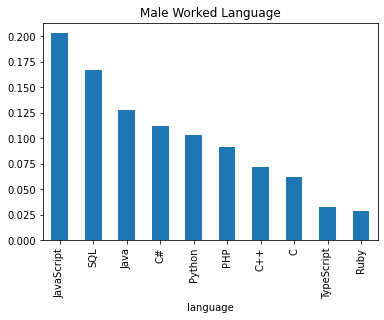

In [41]:
# plot top 10 language for males
male_lang_fig = clean_and_plot(male_gender_lang, 'Male Worked Language', plot=True, top=10)


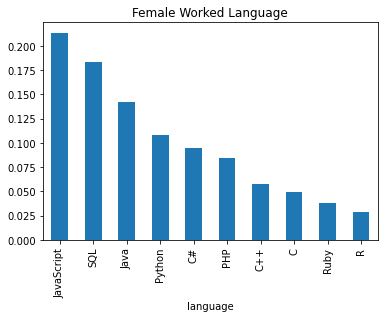

In [42]:
# plot top 10 language for females
female_lang_fig = clean_and_plot(female_gender_lang, 'Female Worked Language', plot=True, top=10)

In [43]:
# gender / country dataframe
respondant_country = survey_df[survey_df.Gender.isin(possible_gender)].loc[:,["Respondent", "Country", "Gender"]]
respondant_country

,Respondent,Country,Gender
0,1,United States,Male
1,2,United Kingdom,Male
2,3,United Kingdom,Male
3,4,United States,Male
6,7,United States,Male
...,...,...,...
51386,51387,Romania,Male
51387,51388,United States,Male
51388,51389,Venezuela,Male
51390,51391,United States,Male


actually no, javascript, sql, and java are the most popular programming languages for both men and women, according to the analysis. so we try to now the number of devloper in each gender by asking

In [44]:
respondant_country

,Respondent,Country,Gender
0,1,United States,Male
1,2,United Kingdom,Male
2,3,United Kingdom,Male
3,4,United States,Male
6,7,United States,Male
...,...,...,...
51386,51387,Romania,Male
51387,51388,United States,Male
51388,51389,Venezuela,Male
51390,51391,United States,Male


In [45]:
def top_countries(df, top):
    '''
    INPUT:
    df - the pandas dataframe you want to filter
    top - number of countries to bre returned
    OUTPUT:
    new_df - a dataframe of top n countries
    '''
    return df.groupby(["Country"]).count().sort_values(['Gender','Country'], ascending=False).head(top).index

In [46]:
# get count of top 5 countries group by gender
top_respondent_country = respondant_country[respondant_country.Country.isin(top_countries(respondant_country, 5))]
top_respondent_country = top_respondent_country.groupby(["Country", "Gender"]).count().reset_index().pivot(index="Country", columns="Gender", values="Respondent")
top_respondent_country

Gender,Female,Male
Country,,
Canada,150,1446
Germany,153,2740
India,230,2422
United Kingdom,221,2954
United States,847,7447


### what is the gender distribution of developers in each country?

<AxesSubplot:xlabel='Country'>

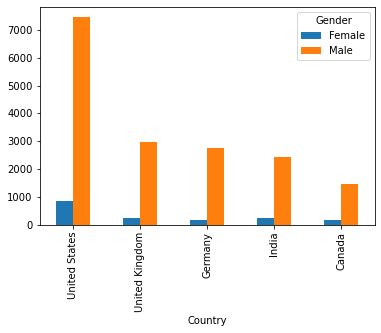

In [47]:
top_respondent_country.sort_values(["Male", "Female"], ascending=False).plot.bar()

Surprisingly, there is a significant disparity between male and female developers in this regard.
for example, According to the data, the number of male developers in the United States outnumbers the number of female developers by 88%. 

In [64]:
# gender / hour per week dataframe
gender_hours = survey_df[survey_df.Gender.isin(possible_gender)].loc[:,["Country", "HoursPerWeek", "Gender"]]
# we're concerned with HoursPerWeek values so we can eliminate null values — however looking at the data, we discovered that there is no such item as a null value
gender_hours.dropna(subset=["HoursPerWeek"], inplace=True)
gender_hours

,Country,HoursPerWeek,Gender
0,United States,0.0,Male
3,United States,5.0,Male
6,United States,1.0,Male
7,Poland,1.0,Male
8,Colombia,2.0,Male
...,...,...,...
51385,United Kingdom,4.0,Female
51386,Romania,2.0,Male
51387,United States,5.0,Male
51390,United States,1.0,Male


In [21]:
#get gender / hour per week for top 10 countries
top_gender_hours = gender_hours[gender_hours.Country.isin(top_countries(respondant_country, 10))]
top_gender_hours

,Country,HoursPerWeek,Gender
0,United States,0.0,Male
3,United States,5.0,Male
6,United States,1.0,Male
7,Poland,1.0,Male
9,France,1.0,Male
...,...,...,...
51382,France,0.0,Male
51384,United States,0.0,Male
51385,United Kingdom,4.0,Female
51387,United States,5.0,Male


In [22]:
# get average hours per weeek per gender for top 10 countries
top_gender_hours = top_gender_hours.groupby(["Country", "Gender"]).mean().reset_index().pivot(index="Country", columns="Gender", values="HoursPerWeek")
top_gender_hours

Gender,Female,Male
Country,,
Australia,2.300000,2.711744
Canada,3.938462,2.825564
France,3.000000,2.715203
Germany,2.945455,2.238267
India,6.547445,6.253155
Netherlands,1.777778,2.520179
Poland,2.063830,2.245000
Russian Federation,2.882353,3.304029
United Kingdom,2.646341,2.572358


### Is there a difference in working hours between men and women? 

<AxesSubplot:ylabel='Country'>

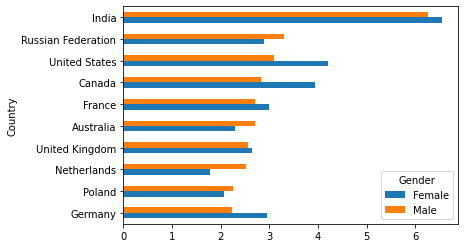

In [23]:
top_gender_hours.sort_values(["Male", "Female"]).plot.barh()

We were surprised to learn that in many nations, women work longer hours than males.

In [24]:
# check professional values
survey_df.Professional.value_counts()

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

In [25]:
#professinal of interest
# professional = ['Professional developer', '']

In [26]:
# get professional / gender dataframe
professional_gender_df = survey_df[survey_df.Gender.isin(possible_gender)].loc[:,["Respondent", "Professional", "Gender"]]
professional_gender_df

,Respondent,Professional,Gender
0,1,Student,Male
1,2,Student,Male
2,3,Professional developer,Male
3,4,Professional non-developer who sometimes write...,Male
6,7,Professional non-developer who sometimes write...,Male
...,...,...,...
51386,51387,Professional developer,Male
51387,51388,Professional developer,Male
51388,51389,Student,Male
51390,51391,Professional developer,Male


In [27]:
# get count per gender per professional
professional_gender_agg = professional_gender_df.groupby(["Professional", "Gender"]).count().reset_index().pivot(index="Professional", columns="Gender", values="Respondent")
professional_gender_agg

Gender,Female,Male
Professional,,
None of these,26,500
Professional developer,1842,23756
Professional non-developer who sometimes writes code,327,2873
Student,353,3865
Used to be a professional developer,52,595


### How many programming learner are there in each gender? 

<AxesSubplot:xlabel='Professional'>

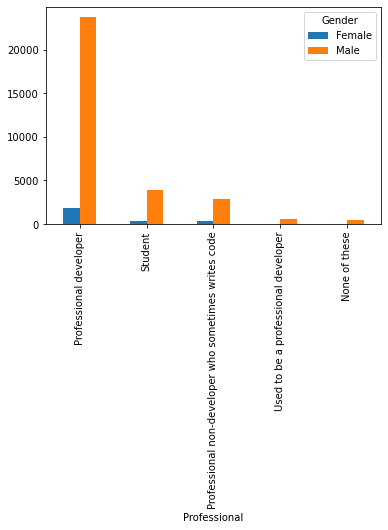

In [28]:
professional_gender_agg.sort_values(["Male", "Female"], ascending=False).plot.bar()

Finally, we'd like to determine which gender is most interested in learning about programming by looking at the number of students in each gender.

We see that there are more male students than female learners, and that the number of males who used to write code is also higher.

## Inferences and Conclusions

Many inferences have been taken from the questions posed. Here's a brief overview of a few:
<ol>
    <li> There is no preferred language for a given gender, and programming languages are not a classifier measure between males and females.</li>
    <li> Whether working as a professional developer or as students, males are the dominate gender. </li>
    <li> In some countries (with a high percentage of male developers), female developers work longer hours than male developers, which may influence their decision to study programming.</li>
</ol>